In [1]:
#Tässä notebookissa tehdään kolme erilaista visualisointia esimerkkidatasta ja säädetään niiden ulkonäköä. 
#Aloitetaan lataamalla Excel-tiedosto ja siitä pylväskaaviossa tarvittava data.
#Visualisointiin käytetään ggplot2-kirjastoa, joka on monipuolisempi kuin R:n oletuskirjasto, jota käytettiin aiemmin.

library(readxl)

data <- read_excel("C:\\Users\\Installer\\Desktop\\dao_visualisoinnit.xlsx", sheet = "Pylvas")

print(data)

# A tibble: 16 × 3
   Toimipaikka Neljännes `Myynti (1000 €)`
   <chr>           <dbl>             <dbl>
 1 A                   1             10242
 2 B                   1             14801
 3 C                   1             11262
 4 D                   1             19017
 5 A                   2             15638
 6 B                   2             12079
 7 C                   2             16472
 8 D                   2             11936
 9 A                   3             12635
10 B                   3             12937
11 C                   3             17736
12 D                   3             11401
13 A                   4             11531
14 B                   4             17492
15 C                   4             19553
16 D                   4             10826


In [2]:
#Piirretään pylväskaavio, jossa esitetään kokonaismyynti toimipaikoittain. Asenna ensin tarvittaessa paketit. 

library(dplyr)
library(ggplot2)
library(scales)

kokmyynti <- data %>%
  group_by(Toimipaikka) %>%
  summarise(Kokonaismyynti = sum(`Myynti (1000 €)`, na.rm = TRUE))

print(kokmyynti)
  
#Putkifunktio %>% siirtää edellisen komennon tuloksen seuraavalle komennolle. Näin koodista saadaan selkeämpää. Yllä oleva
#ilman putkifunktiota olisi
#kokmyynti <- summarise(group_by(data, Toimipaikka),Kokonaismyynti = sum(`Myynti (1000 €)`, na.rm = TRUE))



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# A tibble: 4 × 2
  Toimipaikka Kokonaismyynti
  <chr>                <dbl>
1 A                    50046
2 B                    57309
3 C                    65023
4 D                    53180


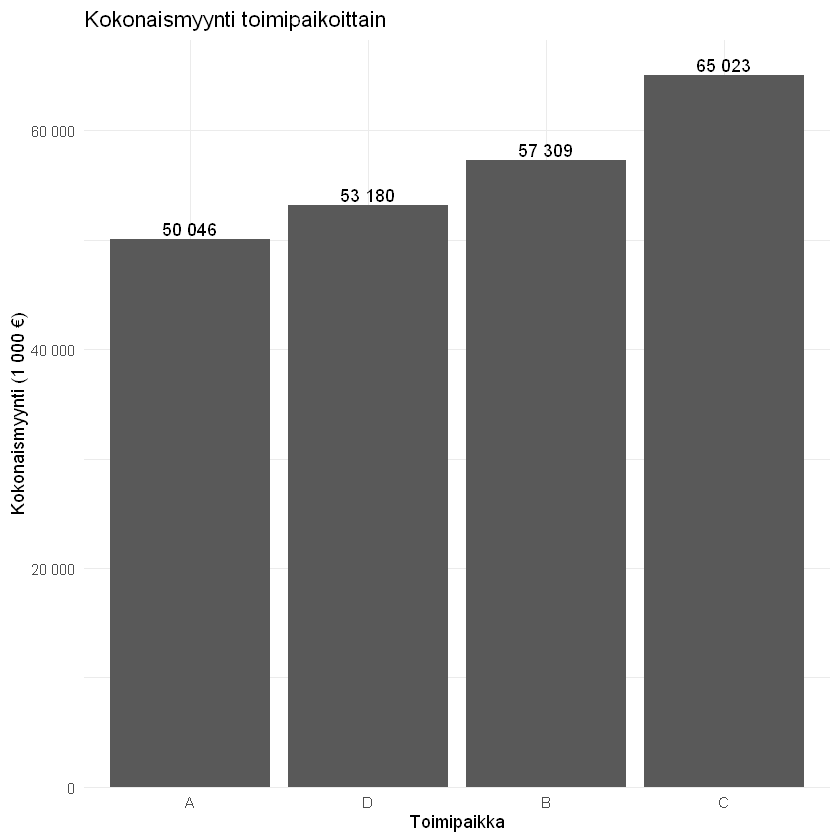

In [3]:
ggplot(kokmyynti, aes(x = reorder(Toimipaikka, Kokonaismyynti),
                  y = Kokonaismyynti)) +
  geom_col() +
  geom_text(aes(label = scales::number(Kokonaismyynti, big.mark = " ")),
            vjust = -0.3) +
  scale_y_continuous(labels = scales::label_number(big.mark = " "),
                     expand = expansion(mult = c(0, .05))) +
  labs(title = "Kokonaismyynti toimipaikoittain",
       x = "Toimipaikka",
       y = "Kokonaismyynti (1 000 €)") +
  theme_minimal()

#ggplot() luo piirtoalustan ja aes() määrittää ominaisuudet
#geom_col() piirtää pylväskaavion, jossa pylvään korkeus määräytyy datan arvosta. 
#theme_minimal luo pelkistetyn kaavion. Kokeile jättää se pois ja katso mitä tapahtuu. 


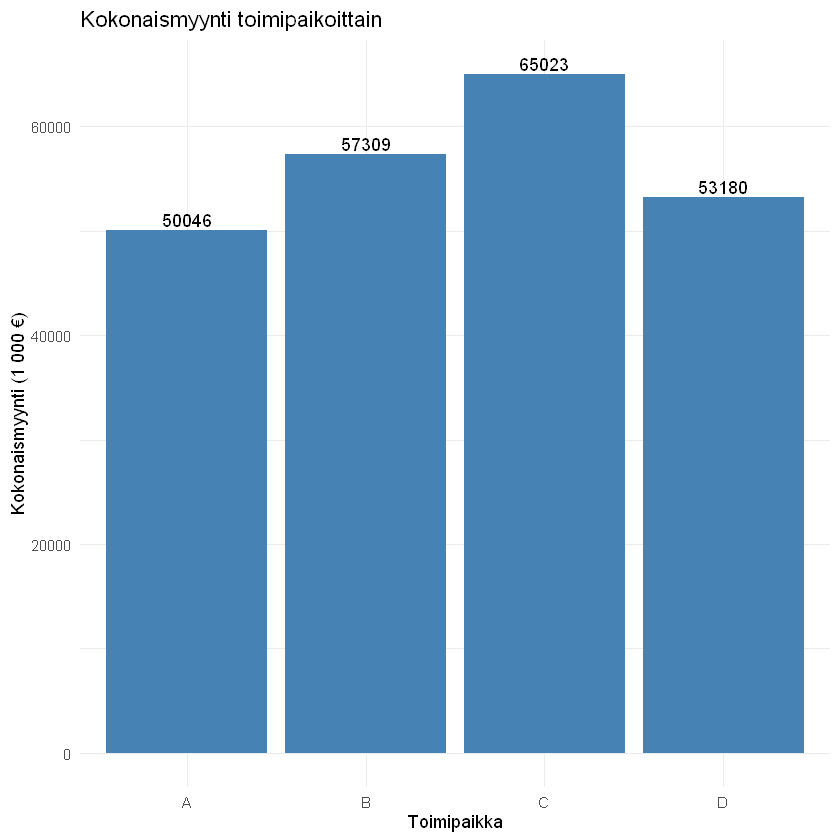

In [4]:
#Nyt R piirtää pylväät väärään järjestykseen. Korjataan tämä factor()-funktion avulla. Merkintä
#kokmyynti$Toimipaikka viittaa tibblen Toimipaikka-sarakkeeseen. Muutetaan samalla pylvään väriä. 

kokmyynti$Toimipaikka <- factor(kokmyynti$Toimipaikka,levels = c("A", "B", "C", "D"))

ggplot(kokmyynti, aes(x = Toimipaikka, y = Kokonaismyynti)) +
  geom_col(fill = "steelblue") +
  geom_text(aes(label = Kokonaismyynti), vjust = -0.3) +
  labs(title = "Kokonaismyynti toimipaikoittain",
       x = "Toimipaikka",
       y = "Kokonaismyynti (1 000 €)") +
  theme_minimal()


# A tibble: 16 × 3
   Toimipaikka Neljännes Myynti
   <chr>           <dbl>  <dbl>
 1 A                   1  10242
 2 A                   2  15638
 3 A                   3  12635
 4 A                   4  11531
 5 B                   1  14801
 6 B                   2  12079
 7 B                   3  12937
 8 B                   4  17492
 9 C                   1  11262
10 C                   2  16472
11 C                   3  17736
12 C                   4  19553
13 D                   1  19017
14 D                   2  11936
15 D                   3  11401
16 D                   4  10826


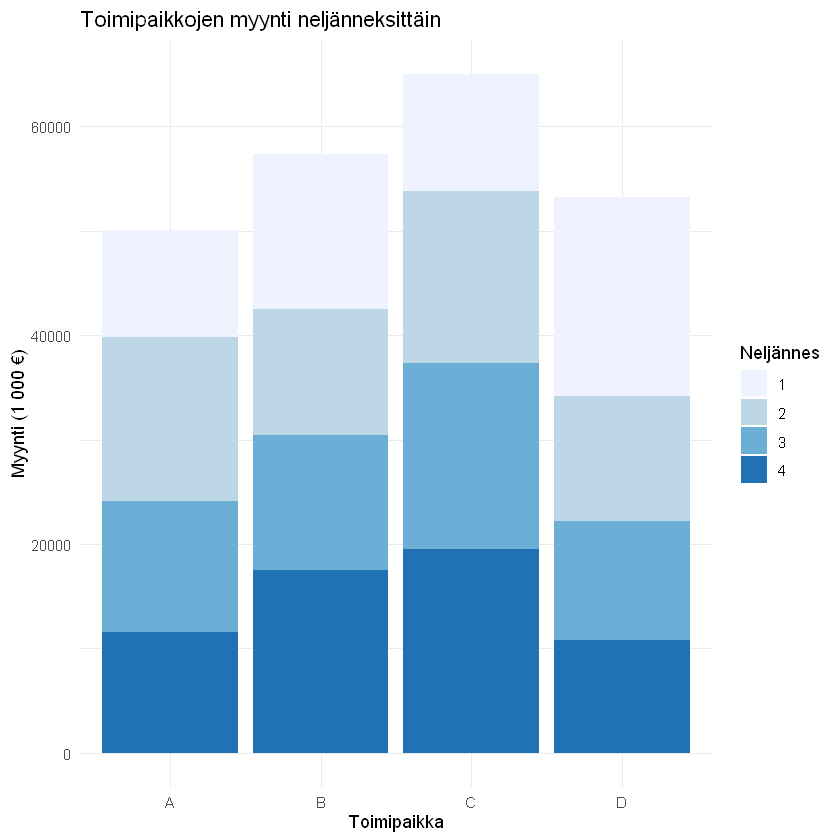

In [5]:
#Piirretään seuraavaksi pylväskaavio, jossa kokonaismyynti on eroteltu neljänneksittäin. 


#Tehdään tibble, jossa data on ryhmitelty toimipaikan ja neljänneksen mukaan. 
summa_nelj <- data %>%
  group_by(Toimipaikka, Neljännes) %>%
  summarise(Myynti = sum(`Myynti (1000 €)`, na.rm = TRUE), .groups = "drop")

print(summa_nelj)

# Varmistetaan, että toimipaikat ja neljännekset ovat oikeassa järjestyksessä
summa_nelj$Toimipaikka <- factor(summa_nelj$Toimipaikka,
                                 levels = c("A", "B", "C", "D"))

summa_nelj$Neljännes <- factor(summa_nelj$Neljännes,
                               levels = c(1, 2, 3, 4))

# Piirretään pinottu pylväskaavio
ggplot(summa_nelj, aes(x = Toimipaikka,
                       y = Myynti,
                       fill = Neljännes)) +
  geom_col() +
  scale_fill_brewer(palette = "Blues") +  # väripaletti
  labs(title = "Toimipaikkojen myynti neljänneksittäin",
       x = "Toimipaikka",
       y = "Myynti (1 000 €)",
       fill = "Neljännes") +
  theme_minimal()



In [6]:
#Piirretään seuraavaksi viivakaavio. Ladataan data. 

data2 <- read_excel("C:\\Users\\Installer\\Desktop\\dao_visualisoinnit.xlsx", sheet = "Viiva")
print(data2)

# A tibble: 21 × 2
   Vuosi Indeksi
   <dbl>   <dbl>
 1  2000    106.
 2  2001    107.
 3  2002    109.
 4  2003    115.
 5  2004    111.
 6  2005    120.
 7  2006    131.
 8  2007    111.
 9  2008    120 
10  2009    130 
# ℹ 11 more rows


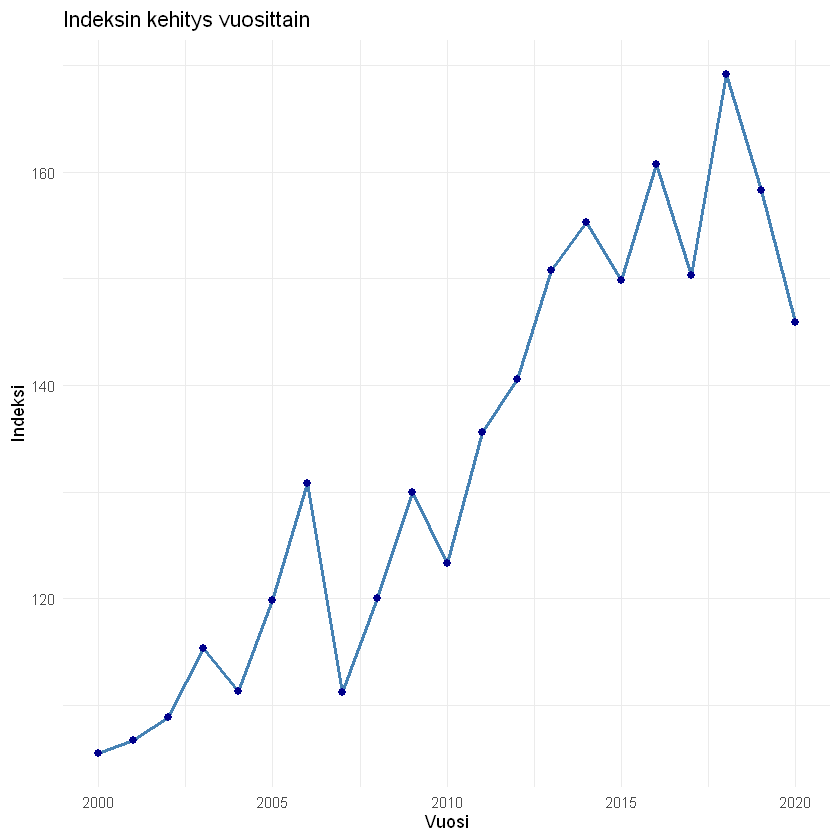

In [7]:
#Piirretään viivakaavio. 

ggplot(data2, aes(x = Vuosi, y = Indeksi)) +
  geom_line(color = "steelblue", linewidth = 1) +
  geom_point(color = "darkblue", size = 2) +
  labs(title = "Indeksin kehitys vuosittain",
       x = "Vuosi",
       y = "Indeksi") +
  theme_minimal()

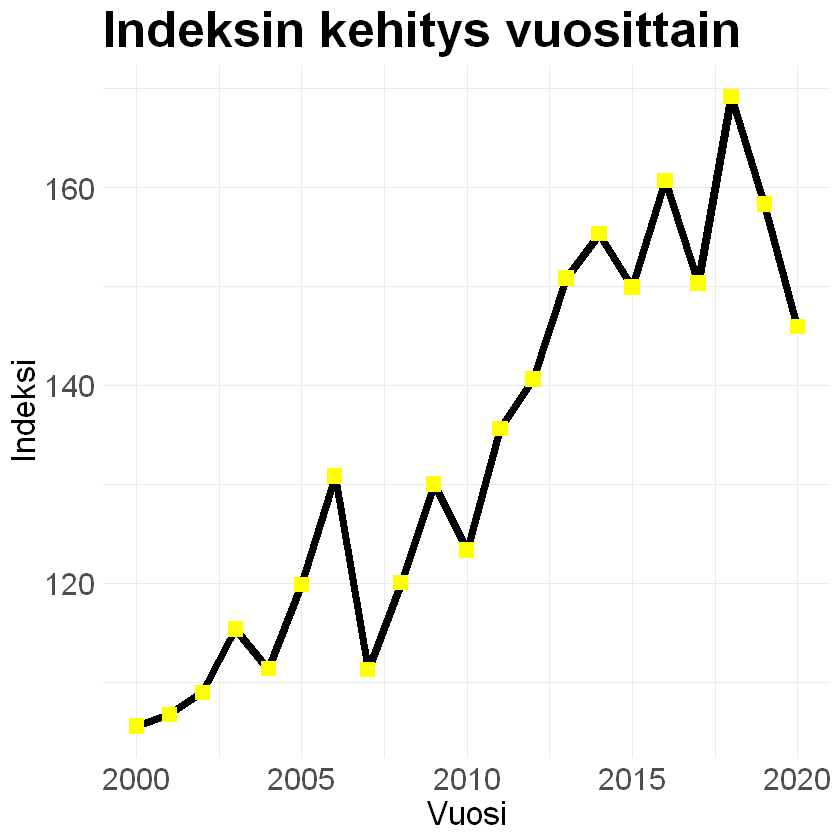

In [8]:
#Muutetaan viiva mustaksi ja markkeri keltaiseksi neliöksi (shape = 15). Paksunnetaan viivaa ja 
#suurennetaan markkeria. Muutetaan lisäksi otsikoiden muotoilua. 

ggplot(data2, aes(x = Vuosi, y = Indeksi)) +
    geom_line(color = "black", linewidth = 2.5) +
    geom_point(shape = 15, color = "yellow", size = 4) +
    labs(title = "Indeksin kehitys vuosittain",
       x = "Vuosi",
       y = "Indeksi") +
    theme_minimal()+
    theme(
        plot.title = element_text(size = 30, face = "bold"),   # otsikon koko ja lihavointi
        axis.title = element_text(size = 20),                  # akselien otsikot
        axis.text  = element_text(size = 18)                   # akselien numerot
  )

In [9]:
#Piirretään viimeiseksi hajontakaavio. 

data3 <- read_excel("C:\\Users\\Installer\\Desktop\\dao_visualisoinnit.xlsx", sheet = "Hajonta")

print(data3)

#Tarkistetaan sarakkeiden nimet. 

names(data3)





# A tibble: 8 × 2
  `Markkinointiin käytetty raha (1 000 €)` `Tulos(1 000 €)`
                                     <dbl>            <dbl>
1                                       50              100
2                                       30               50
3                                       49               45
4                                       89              123
5                                       30               80
6                                       45               90
7                                       66              180
8                                       70              125


[1] "Markkinointiin käytetty raha (1 000 €)"
[2] "Tulos(1 000 €)"

Warning message in geom_point(size = 2):
"All aesthetics have length 1, but the data has 8 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row."


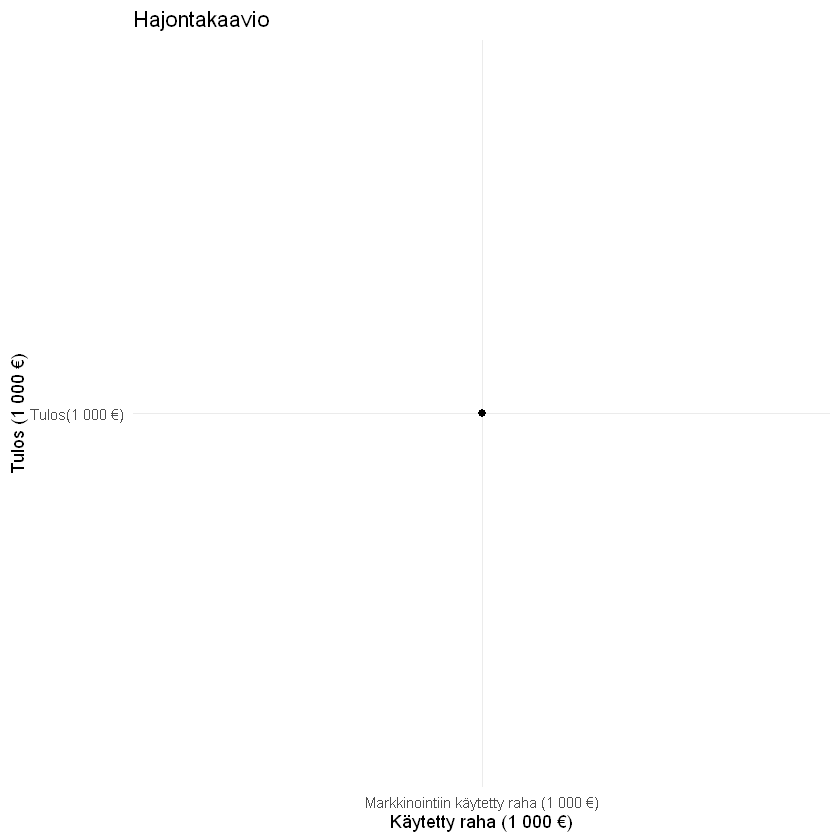

In [10]:
#Piirretään kaavio. 

ggplot(data3,
       aes(x = "Markkinointiin käytetty raha (1 000 €)",
           y = "Tulos(1 000 €)")) +
  geom_point(size = 2) +
  labs(title = "Hajontakaavio",
       x = "Käytetty raha (1 000 €)",
       y = "Tulos (1 000 €)") +
  theme_minimal()




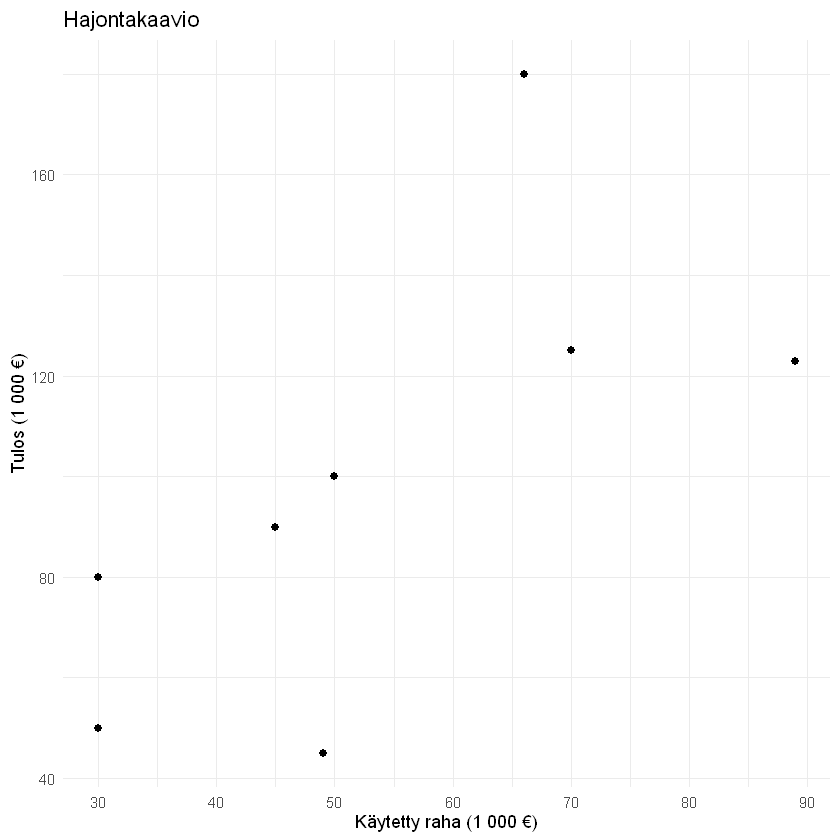

In [11]:
#Nimetään sarakkeet uudelleen. Välilyönnit nimessä aiheuttavat ongelmia. 
#Piirretään kaavio tämän jälkeen. 

data3 <- data3 |>
  rename(Markkinointi = "Markkinointiin käytetty raha (1 000 €)", Tulos = "Tulos(1 000 €)")

ggplot(data3,
    aes(x = Markkinointi,
           y = Tulos)) +
    geom_point(size = 2) +
    labs(title = "Hajontakaavio",
       x = "Käytetty raha (1 000 €)",
       y = "Tulos (1 000 €)") +
    theme_minimal()